<a href="https://colab.research.google.com/github/OlyaSto/Olyabmstu/blob/master/%D0%A2%D0%9C%D0%9E/%D0%9B%D0%A01/LR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Текстовое описание выбранного набора данных**

Для данной лабораторной работы используется набор данных об ирисах. 
Датасет состит из следующих колонок: 


*   sepal length in cm - длина чашелистика в см
*   sepal width in cm - ширина чашелистика в см
*   petal length in cm - длина лепестка в см
*   petal width in cm - ширина лестка в см

### **Импорт бибилиотек**

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### **Загрузка данных**
Преобразование наборов данных Scikit-learn в Pandas Dataframe

In [5]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [6]:
for x in iris:
    print(x)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [7]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris_frame = pd.DataFrame(iris.data)

Имена колонок создаваемой таблицы делаем такими же, как имена переменных в датасете:

In [10]:
iris_frame.columns = iris.feature_names

Добавляем столбец с целевой переменной:

In [11]:
iris_frame['target'] = iris.target

Добавляем столбец с названиями сортов для наглядности:

In [12]:
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])

In [13]:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### 2) Основные характеристика датасета

Первые пять строк датасета:

In [14]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Размер датасета:

In [15]:
iris_frame.shape

(150, 6)

Количество строк:

In [16]:
total_count = iris_frame.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 150


Список колонок:

In [17]:
iris_frame.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'name'],
      dtype='object')

Список колонок с типами данных:

In [18]:
iris_frame.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
name                  object
dtype: object

Проверим наличие пустых значений:

In [19]:
# Цикл по колонкам датасета
for col in iris_frame.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = iris_frame[iris_frame[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0
name - 0


Основные статистические характеристки набора данных:

In [21]:
iris_frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Определим уникальные значения для целевого признака:

In [24]:
iris_frame['target'].unique()

array([0, 1, 2])

Целевой признак может принимать три значения.

### 3)Визуальное исследование датасета

####Гистограмма
Распределение значений sepal length (cm) - длины чашелистика в см

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


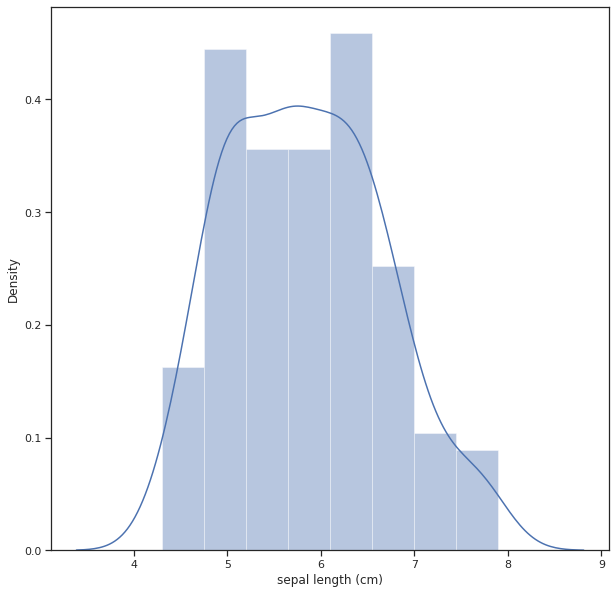

In [29]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(iris_frame['sepal length (cm)'])

### Диаграмма рассеяния


Зависимость распределение длины чашелистика от сорта (целевого признака)

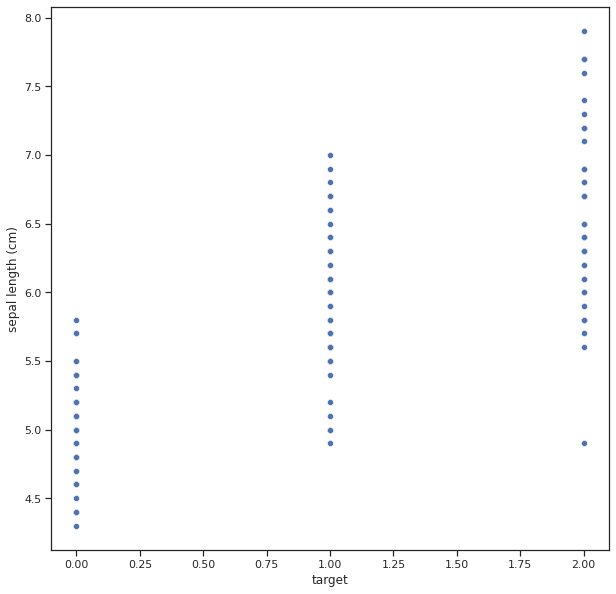

In [35]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='target', y='sepal length (cm)', data=iris_frame)

Зависимость petal length (cm) - длины лепестка от sepal length (cm) - длины чашелистика

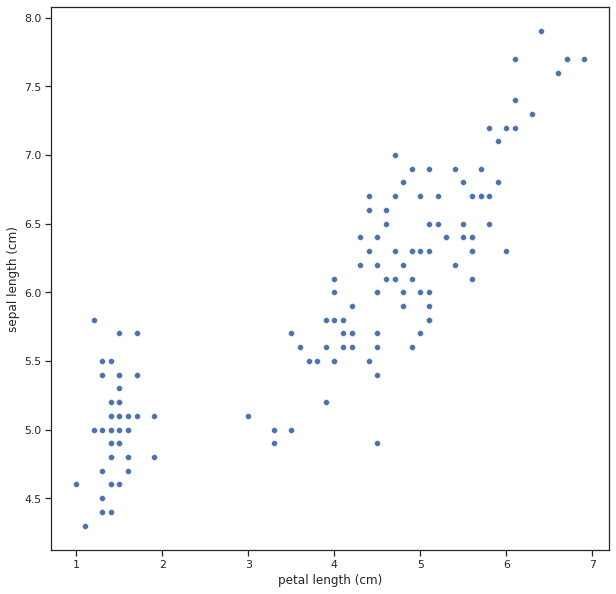

In [38]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='petal length (cm)', y='sepal length (cm)', data=iris_frame)

Можно увидеть, что зависимость этих двух характеристик очень похожа на линейную.

Посмотрим насколько на эту зависимость влияет целевой признак.

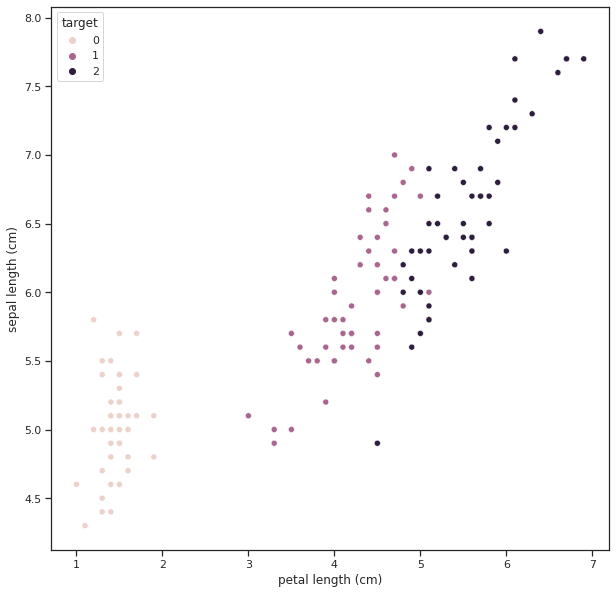

In [39]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='petal length (cm)', y='sepal length (cm)', data=iris_frame, hue = 'target')

Легко прослеживается зависимость: при увелечении значений petal length (cm) и sepal length (cm) увеличивается значение целевого признака target.

### 4) Информация о корреляции признаков

In [41]:
iris_frame.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


На основе полученной коррелирующей можно сделать следующие выводы:
*   Целевой признак наиболее сильно коррелирует с длиной лепестка и с шириной лепестка. Эти признаки следуюет оставить в модели.
*   Также целевой признак достаточно сильно коррелирует с длиной чашелистика. Этот признак следует также оставить. 
*   Слабая отрицательная корреляция у ширины чашелистика. Этот принак можно исключить из модели, чтобы не ухучшать её качество.
*   Признаки длина и ширина лепестка имеют очень сильную корреляцию, поэтому один из них стоит убрать. Уберем Длину лепестка, потому что она меньше коррелирует с целевым признаком. 





Построим "тепловую карту" headmap, которая показывает степень корреляции различными цветами.

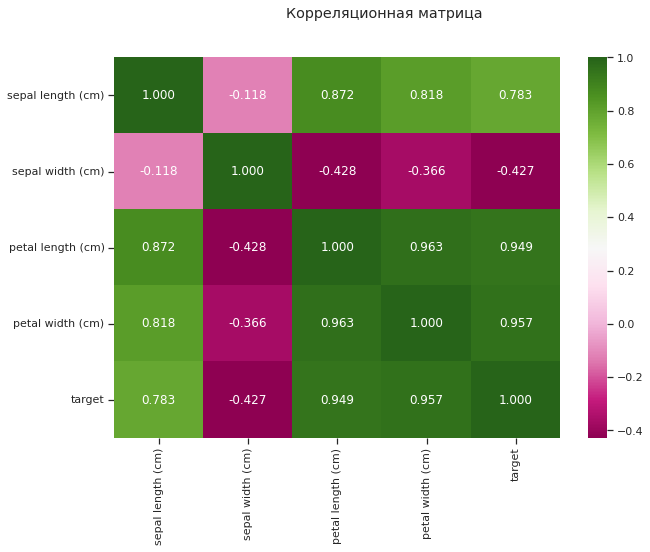

In [51]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,7))
fig.suptitle('Корреляционная матрица')
sns.heatmap(iris_frame.corr(), cmap='PiYG', annot=True, fmt='.3f')

Треугольный вариант матрицы

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


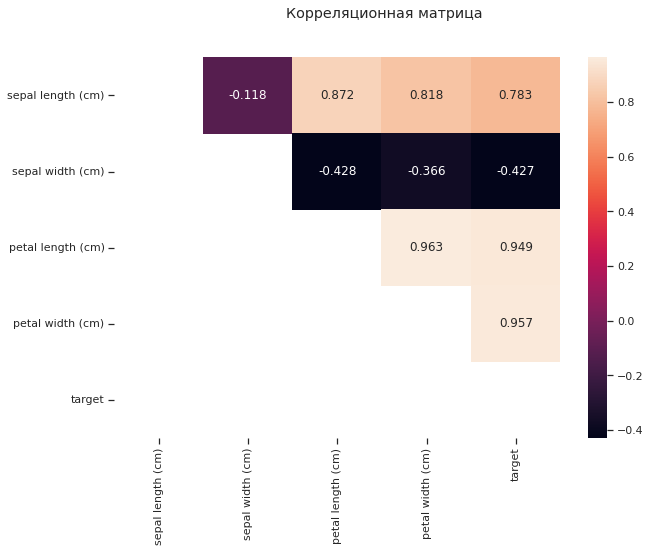

In [52]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,7))
fig.suptitle('Корреляционная матрица')
mask = np.zeros_like(iris_frame.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(iris_frame.corr(), mask=mask, annot=True, fmt='.3f')
